In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import model
import dataset
import torch
import train.MLP_TrainTest as MLP_fn
from sklearn.preprocessing import StandardScaler

In [ ]:
mesh_idx = 365
GJ_coupling = 'weak'
full_seq = True

if full_seq:
    best_model_state_name = f"best_mlp_{GJ_coupling}_fullseq.pth"
else:
    best_model_state_name = f"best_mlp_{GJ_coupling}.pth"

data_path = 'dataset/Weak_GJ_Coupling'
hidden_dims = [128, 128, 256, 256, 128]
class Test_DS(torch.utils.data.Dataset):
    def __init__(self, input, target):
        self.input = torch.tensor(input, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32)

    def __len__(self):
        return len(self.input)

    def __getitem__(self, idx):
        return self.input[idx], self.target[idx]
df = pd.read_csv(os.path.join(data_path, f'Mesh_idx_{mesh_idx}.csv'))
train_DS = dataset.MLPDataset(GJ_coupling='weak', split='train')
input_features, output_features = train_DS.get_IO_features()
mymodel = model.MLP(input_features, hidden_dims, output_features,dropout=0.1)
mymodel.load_state_dict(torch.load(best_model_state_name))
mymodel.eval()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_fn = torch.nn.MSELoss()
scalar = StandardScaler()
input = scalar.fit_transform(df.iloc[:-1, 2:-2].values)
target = scalar.fit_transform(df.iloc[1:, :2].values)
test_DS = Test_DS(input, target)
avg_loss, results = MLP_fn.test_MLP_autoregression(mymodel,
                                                    test_DS,
                                                    device,
                                                    loss_fn
                                                    )

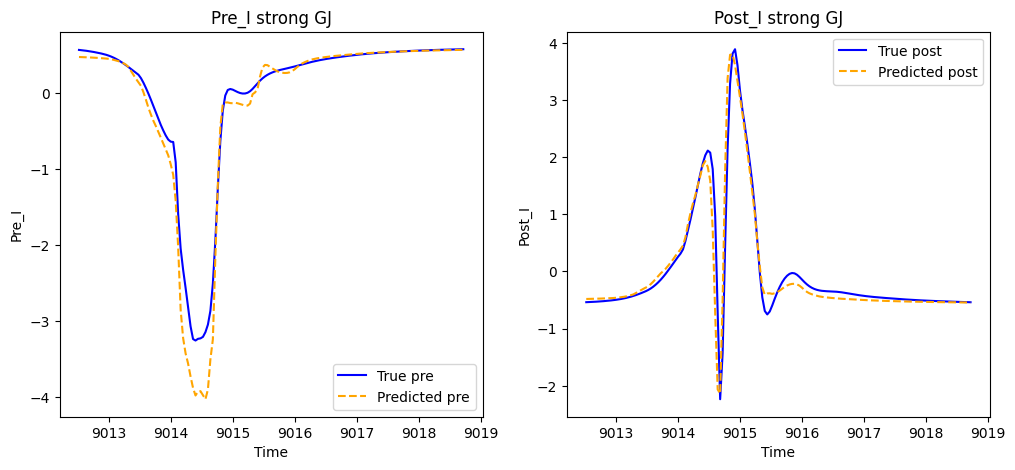

In [3]:
pre_true = target[:,0]
pre_pred = np.array(results[0])
post_true = target[:,1]
post_pred = np.array(results[1])
T = np.array(df['t_save'].values[1:])
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(T, pre_true, label='True pre', color='blue')
plt.plot(T, pre_pred, label='Predicted pre', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Pre_I')
plt.title('Pre_I strong GJ')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(T, post_true, label='True post', color='blue')
plt.plot(T, post_pred, label='Predicted post', color='orange', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Post_I')
plt.title('Post_I strong GJ')
plt.legend()

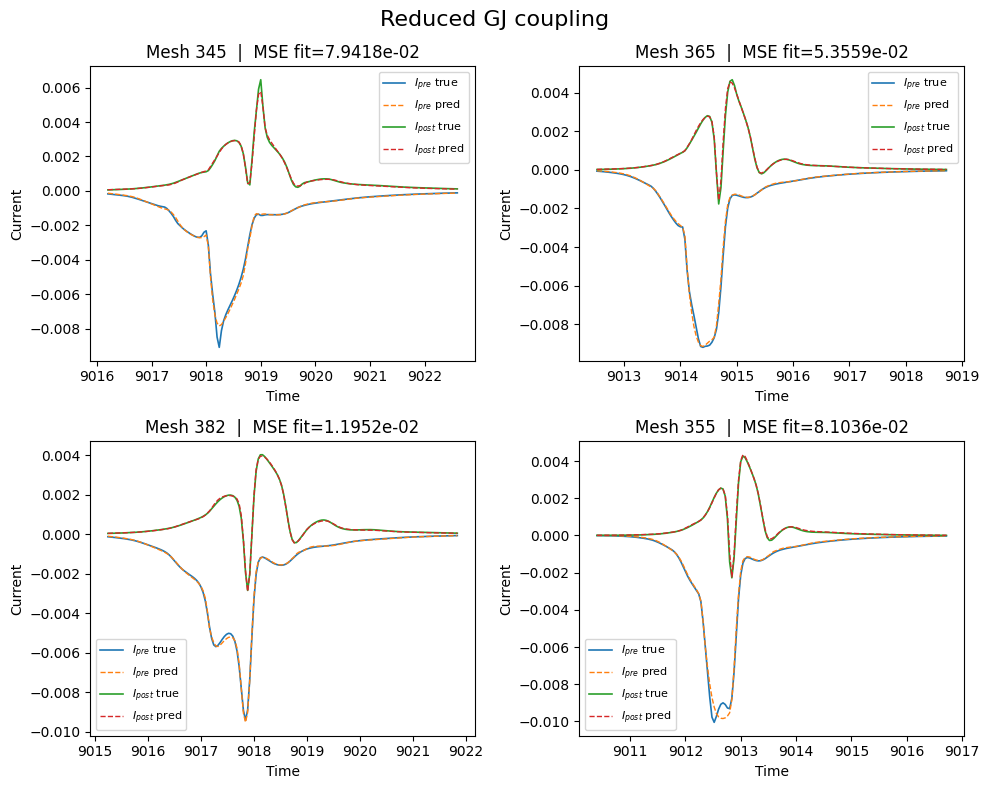

In [4]:
from Plot_fn import plot_ID_current
import model
import torch.nn as nn
import torch
import dataset

GJ_coupling = 'weak'
full_seq = True
hidden_dims = [128, 128, 256, 256, 128]
input_features = 9
output_features = 2
train_DS = dataset.MLPDataset(GJ_coupling=GJ_coupling, split='train',full_seq=full_seq)

if GJ_coupling == 'strong':
    if full_seq:
        model_path = 'Model_state/MLP/best_mlp_strong_fullseq.pth'
    else:
        model_path = 'Model_state/MLP/best_mlp_strong.pth'
else:
    if full_seq:
        model_path = 'Model_state/MLP/best_mlp_weak_fullseq.pth'
    else:
        model_path = 'Model_state/MLP/best_mlp_weak.pth'

mymodel = model.MLP(input_features, hidden_dims, output_features,dropout=0.1)
mymodel.load_state_dict(torch.load(model_path))
loss_fn = nn.MSELoss()
plot_ID_current([345,365,382,355],mymodel,normalization='zscore',loss_fn=loss_fn,GJ_coupling=GJ_coupling,full_seq=False,scaler=train_DS.scaler)

In [5]:
import pickle
import os
scaler = train_DS.scaler

scaler_filename = os.path.join("Scaler", "weak_standard_scaler.pkl")
if not os.path.exists("Scaler"):
    os.makedirs("Scaler")
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import model
import dataset
import torch
import train.MLP_TrainTest as MLP_fn
from sklearn.preprocessing import StandardScaler

mesh_idx = 365
GJ_coupling = 'weak'
full_seq = True

if full_seq:
    best_model_state_name = f"best_mlp_{GJ_coupling}_fullseq.pth"
else:
    best_model_state_name = f"best_mlp_{GJ_coupling}.pth"

data_path = 'dataset/Weak_GJ_Coupling'
hidden_dims = [128, 128, 256, 256, 128]
class Test_DS(torch.utils.data.Dataset):
    def __init__(self, input, target):
        self.input = torch.tensor(input, dtype=torch.float32)
        self.target = torch.tensor(target, dtype=torch.float32)

    def __len__(self):
        return len(self.input)

    def __getitem__(self, idx):
        return self.input[idx], self.target[idx]
df = pd.read_csv(os.path.join(data_path, f'Mesh_idx_{mesh_idx}.csv'))
train_DS = dataset.MLPDataset(GJ_coupling='weak', split='train')
input_features, output_features = train_DS.get_IO_features()